In [1]:
import os
import os.path
import numpy as np
import pickle
import pandas as pd
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plants = []
plant_f = open('/home/reneoctavio/Documents/TaxPlant/label.txt')
for line in plant_f:
    plants.append(line.rsplit('\n')[0])
plants.remove('Davallia fejeensis')

In [3]:
results = {}
results_file = open(os.path.join('/home/reneoctavio/Documents/Plantas+/New', 'scores.pkl'), 'rb')
results = pickle.load(results_file)
results_file.close()

In [4]:
setn = 'test'
true_labels = []
pred_labels = []

for plant in plants:
    pred_labels.append(results[plant]['pred'][setn])
    true_labels.append(results[plant]['true'][setn])

true_labels = np.hstack(arr for arr in true_labels)
pred_labels = np.hstack(arr for arr in pred_labels)

cnf_matrix = confusion_matrix(true_labels, pred_labels)

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)#, vmin=0.0, vmax=1.0)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


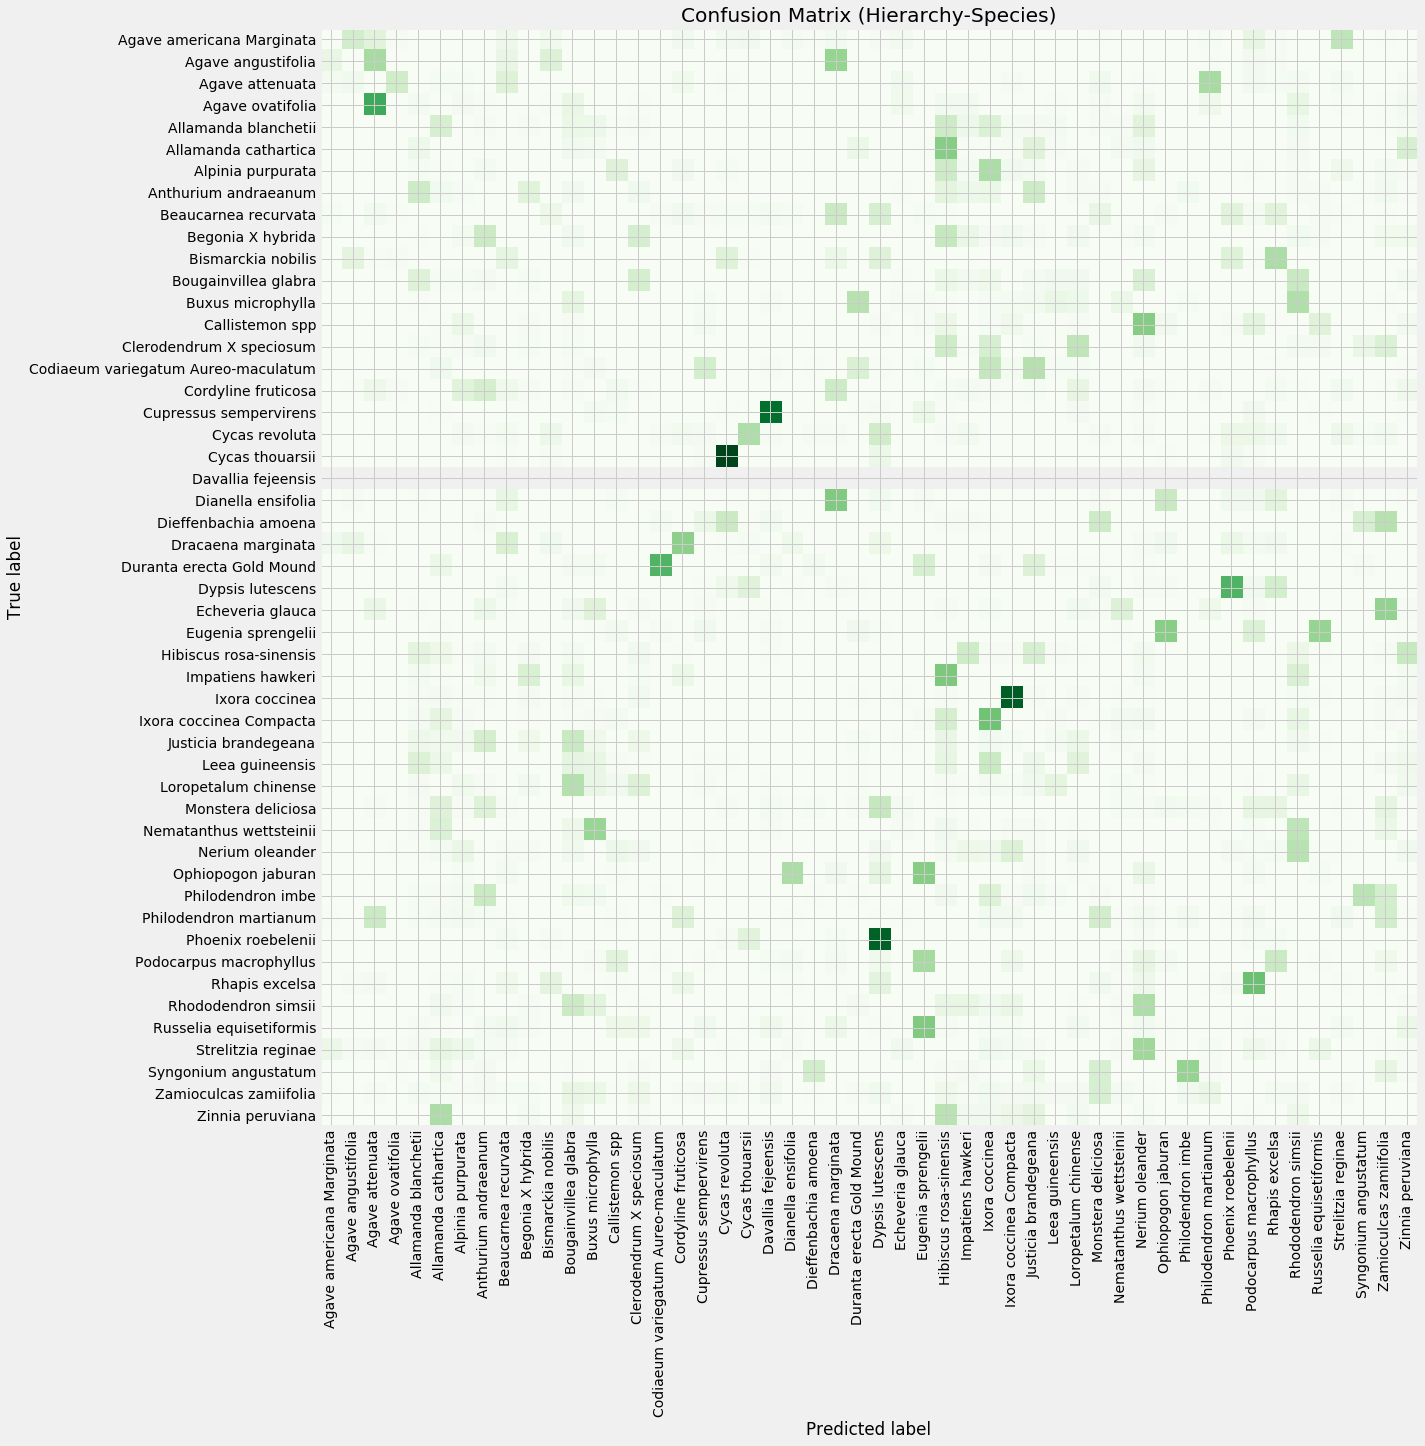

In [25]:
codes = pd.read_csv('/home/reneoctavio/Documents/TaxPlant/tax_plants.csv', index_col=0)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix_h, classes=sorted(codes.index.tolist()), normalize=True,
                      title='Confusion Matrix (Hierarchy-Species)')

# r_path = '/home/reneoctavio/Documents/TaxPlant/resources/tree'
# plt.savefig(os.path.join(r_path, 'analysis', setn, 'cm-all-Species.png'), bbox_inches='tight')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


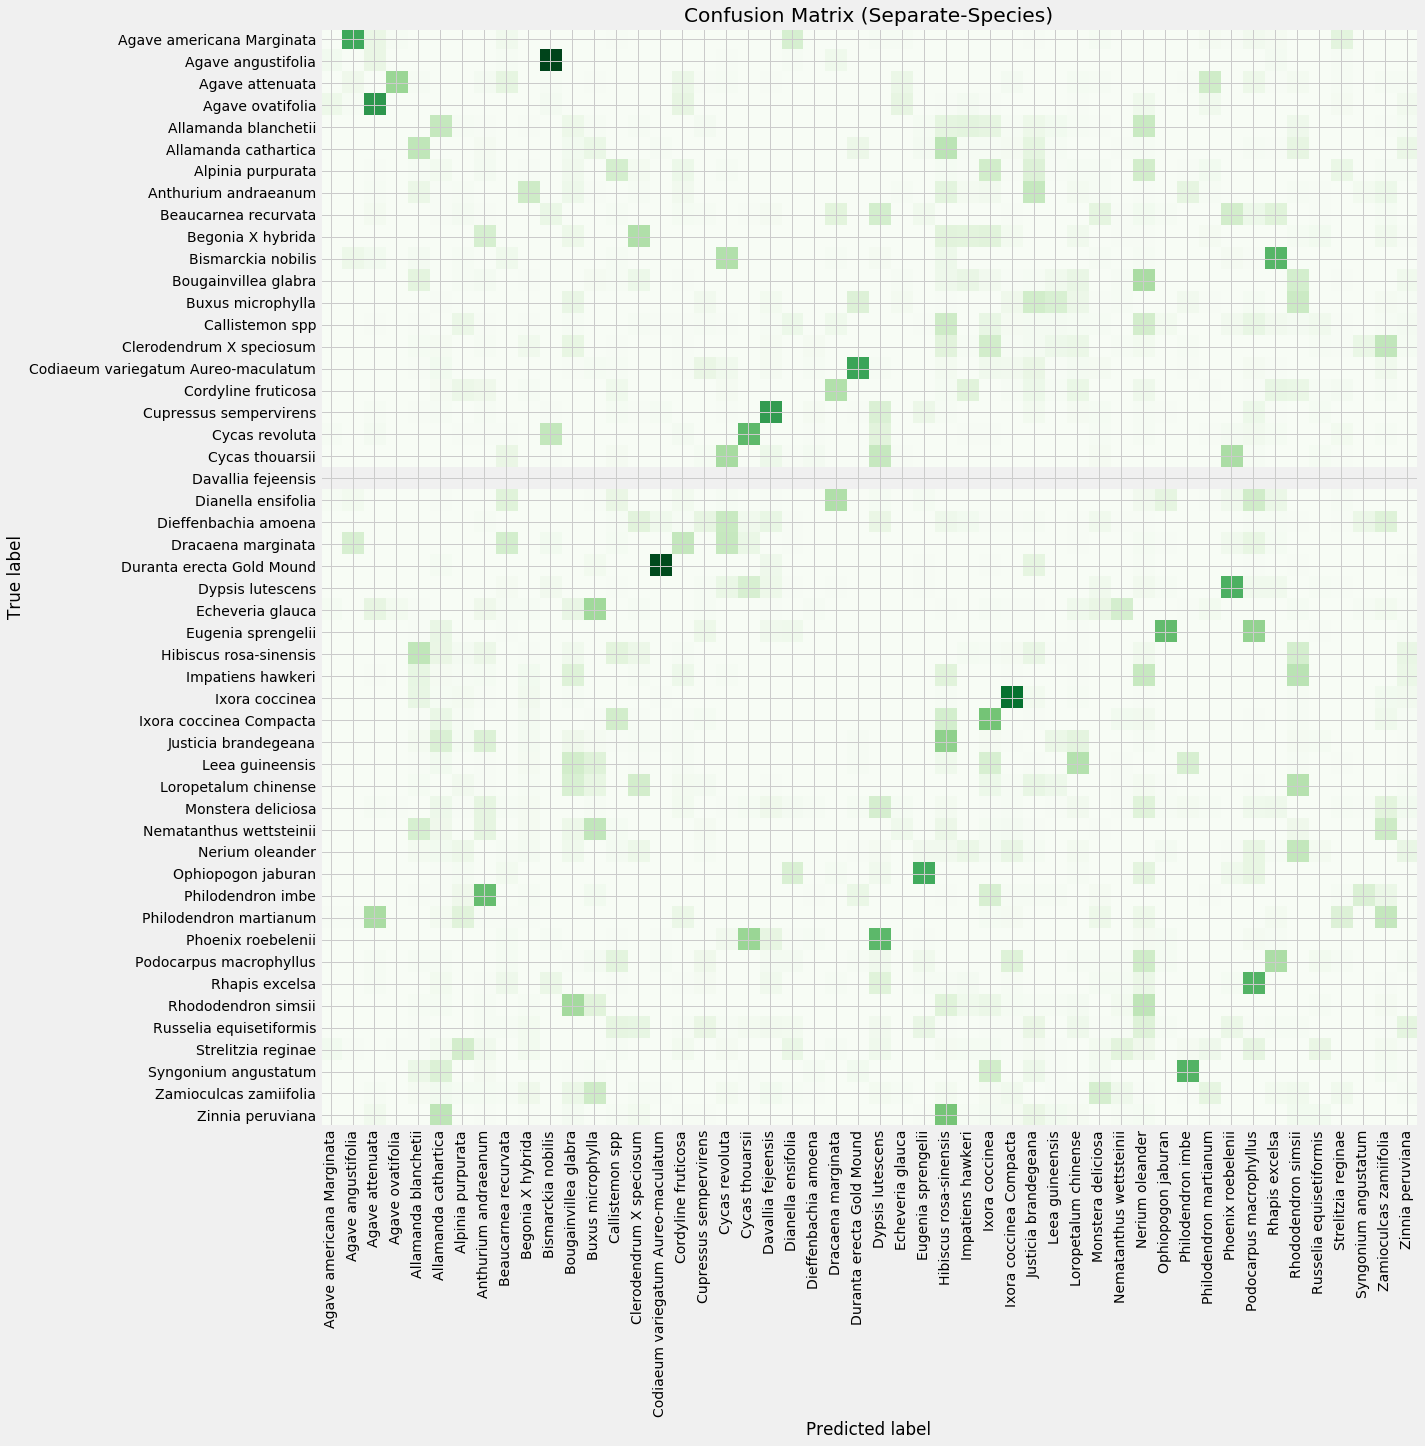

In [26]:
codes = pd.read_csv('/home/reneoctavio/Documents/TaxPlant/tax_plants.csv', index_col=0)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=sorted(codes.index.tolist()), normalize=True,
                      title='Confusion Matrix (Separate-Species)')

In [7]:
results_h = {}
for plant in plants:
    results_file = open(os.path.join('/home/reneoctavio/Documents/Plantas+/New/', plant, 'Species', 'tree', 'props.pkl'), 'rb')
    results_h[plant] = pickle.load(results_file)
    results_file.close()

In [8]:
true_labels = []
pred_labels = []

for plant in plants:
    pred_labels.append(results_h[plant][setn]['Species']['indices'][:,0].astype('int'))
    true_labels.append(results_h[plant][setn]['Species']['labels'].astype('int'))

true_labels = np.hstack(arr for arr in true_labels)
pred_labels = np.hstack(arr for arr in pred_labels)

cnf_matrix_h = confusion_matrix(true_labels, pred_labels)

In [9]:
cnf = np.abs(cnf_matrix - cnf_matrix_h)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


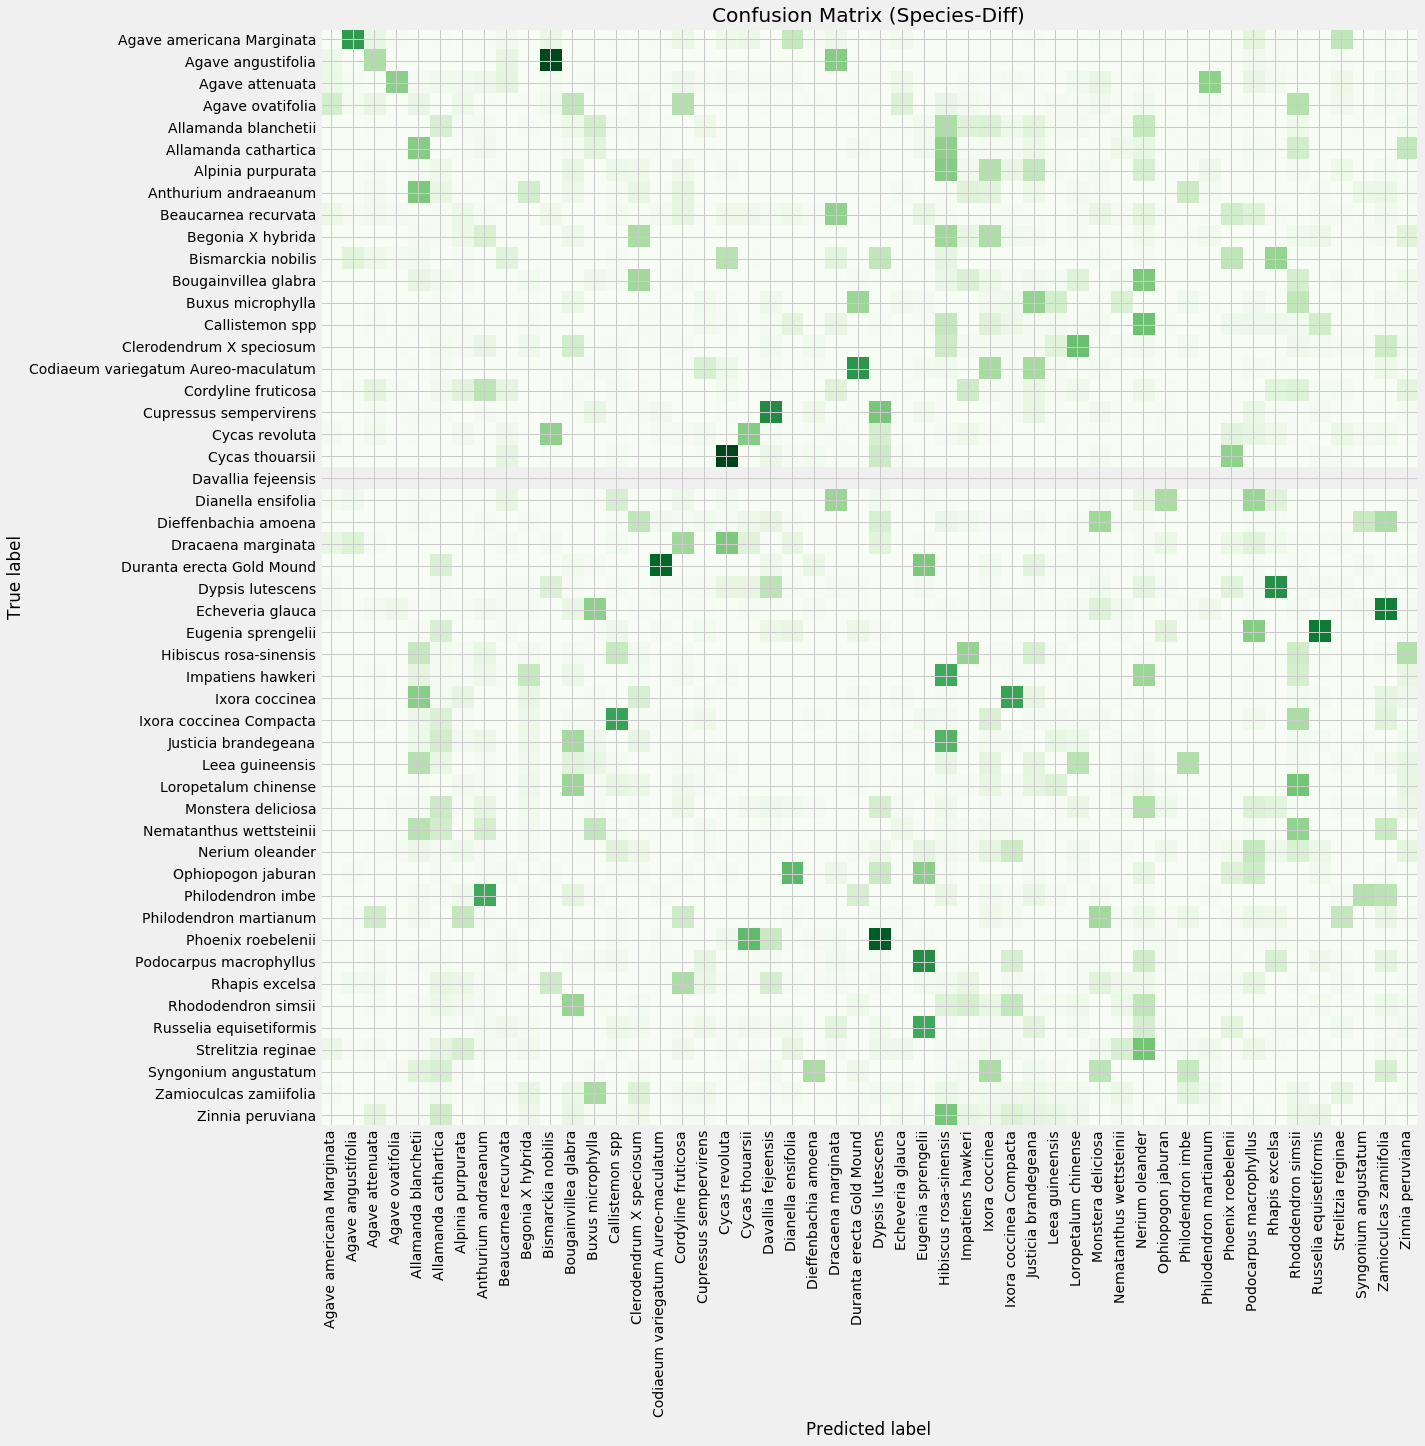

In [10]:
# Difference
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf, classes=sorted(codes.index.tolist()), normalize=True,
                      title='Confusion Matrix (Species-Diff)')

# r_path = '/home/reneoctavio/Documents/TaxPlant/resources/tree'
# plt.savefig(os.path.join(r_path, 'analysis', setn, 'cm-all-Species-diff.png'), bbox_inches='tight')

In [11]:
np.argsort(cnf_matrix, axis=1)[:,::-1][:,:5]

array([[ 1, 21, 46,  2,  8],
       [10,  2, 23,  0, 43],
       [ 3, 40,  8, 16, 26],
       [ 2, 16, 26,  0, 37],
       [ 5, 37, 29, 28, 30],
       [28,  4, 32, 44, 12],
       [30, 37, 13, 32, 46],
       [32,  9, 28, 39,  4],
       [41, 25, 43, 23, 35],
       [14,  7, 30, 28, 29],
       [43, 18,  1, 28,  8],
       [37, 44,  4, 34, 29],
       [44, 32, 33, 24, 11],
       [28, 37, 42, 30,  6],
       [48, 30, 28, 11, 47],
       [24, 32, 17, 30, 18],
       [23, 29, 43, 34, 44],
       [20, 25, 27, 42, 32],
       [19, 10, 25, 42, 46],
       [18, 41, 25,  8, 20],
       [49, 12, 22, 21, 20],
       [23, 42,  8, 38, 13],
       [18, 48, 14, 17, 20],
       [16, 18,  8,  1, 42],
       [15, 32, 20, 12,  5],
       [41, 19, 18, 20, 43],
       [12, 36,  2, 11, 35],
       [38, 42,  5, 17, 21],
       [ 4, 44, 13, 32, 49],
       [44, 37, 11, 28,  4],
       [31,  4,  9, 49, 48],
       [30, 13, 28,  5, 48],
       [28,  5,  7, 34, 33],
       [34, 11, 39, 30, 12],
       [44, 14

In [12]:
np.argsort(cnf_matrix_h, axis=1)[:,::-1][:,:5]

array([[46,  1,  2, 42,  8],
       [23,  2, 10,  8,  0],
       [40,  3,  8, 16, 26],
       [ 2, 44, 11, 40, 26],
       [28,  5, 30, 37, 11],
       [28, 49, 32, 24,  4],
       [30, 28, 13, 37, 46],
       [ 4, 32,  9, 28, 30],
       [23, 25, 41, 43, 35],
       [28,  7, 14, 29, 49],
       [43, 18, 41, 25,  1],
       [44, 14, 37,  4, 28],
       [44, 24, 11, 33, 36],
       [37, 45, 42,  6, 28],
       [34, 28, 30, 48, 47],
       [32, 30, 17, 24,  5],
       [23,  7,  6, 34,  2],
       [20, 27, 42, 12, 34],
       [19, 25, 42, 41, 10],
       [18, 25, 41, 17, 42],
       [49, 12, 22, 21, 20],
       [23, 38, 43,  8, 41],
       [48, 18, 35, 47, 17],
       [16,  8,  1, 41, 25],
       [15, 27, 32,  5, 20],
       [41, 43, 19, 18, 42],
       [48, 36, 12,  2,  7],
       [38, 45, 42, 17, 24],
       [49, 29, 32,  4, 44],
       [28,  9, 44, 11, 16],
       [31, 14, 49,  5,  9],
       [30, 28,  5, 44, 37],
       [11,  7, 28, 34, 14],
       [30,  4, 34, 11, 28],
       [11, 14

In [13]:
codes.sort_values(by=codes.columns.tolist())

Kingdom        Phylum           Class  \
Cycas revoluta                       Plantae  Tracheophyta     Cycadopsida   
Cycas thouarsii                      Plantae  Tracheophyta     Cycadopsida   
Anthurium andraeanum                 Plantae  Tracheophyta      Liliopsida   
Dieffenbachia amoena                 Plantae  Tracheophyta      Liliopsida   
Monstera deliciosa                   Plantae  Tracheophyta      Liliopsida   
Philodendron imbe                    Plantae  Tracheophyta      Liliopsida   
Philodendron martianum               Plantae  Tracheophyta      Liliopsida   
Syngonium angustatum                 Plantae  Tracheophyta      Liliopsida   
Zamioculcas zamiifolia               Plantae  Tracheophyta      Liliopsida   
Bismarckia nobilis                   Plantae  Tracheophyta      Liliopsida   
Dypsis lutescens                     Plantae  Tracheophyta      Liliopsida   
Phoenix roebelenii                   Plantae  Tracheophyta      Liliopsida   
Rhapis excelsa                       Plantae  Tracheophyta      Liliopsida   
Agave americana Marginata            Plantae  Tracheophyta      Liliopsida   
Agave angustifolia                   Plantae  Tracheophyta      Liliopsida   
Agave attenuata                      Plantae  Tracheophyta      Liliopsida   
Agave ovatifolia                     Plantae  Tracheophyta      Liliopsida   
Beaucarnea recurvata                 Plantae  Tracheophyta      Liliopsida   
Cordyline fruticosa                  Plantae  Tracheophyta      Liliopsida   
Dracaena marginata                   Plantae  Tracheophyta      Liliopsida   
Ophiopogon jaburan                   Plantae  Tracheophyta      Liliopsida   
Dianella ensifolia                   Plantae  Tracheophyta      Liliopsida   
Strelitzia reginae                   Plantae  Tracheophyta      Liliopsida   
Alpinia purpurata                    Plantae  Tracheophyta      Liliopsida   
Zinnia peruviana                     Plantae  Tracheophyta   Magnoliopsida   
Buxus microphylla                    Plantae  Tracheophyta   Magnoliopsida   
Bougainvillea glabra                 Plantae  Tracheophyta   Magnoliopsida   
Begonia X hybrida                    Plantae  Tracheophyta   Magnoliopsida   
Impatiens hawkeri                    Plantae  Tracheophyta   Magnoliopsida   
Rhododendron simsii                  Plantae  Tracheophyta   Magnoliopsida   
Allamanda blanchetii                 Plantae  Tracheophyta   Magnoliopsida   
Allamanda cathartica                 Plantae  Tracheophyta   Magnoliopsida   
Nerium oleander                      Plantae  Tracheophyta   Magnoliopsida   
Ixora coccinea                       Plantae  Tracheophyta   Magnoliopsida   
Ixora coccinea Compacta              Plantae  Tracheophyta   Magnoliopsida   
Justicia brandegeana                 Plantae  Tracheophyta   Magnoliopsida   
Nematanthus wettsteinii              Plantae  Tracheophyta   Magnoliopsida   
Clerodendrum X speciosum             Plantae  Tracheophyta   Magnoliopsida   
Russelia equisetiformis              Plantae  Tracheophyta   Magnoliopsida   
Duranta erecta Gold Mound            Plantae  Tracheophyta   Magnoliopsida   
Codiaeum variegatum Aureo-maculatum  Plantae  Tracheophyta   Magnoliopsida   
Hibiscus rosa-sinensis               Plantae  Tracheophyta   Magnoliopsida   
Callistemon spp                      Plantae  Tracheophyta   Magnoliopsida   
Eugenia sprengelii                   Plantae  Tracheophyta   Magnoliopsida   
Echeveria glauca                     Plantae  Tracheophyta   Magnoliopsida   
Loropetalum chinense                 Plantae  Tracheophyta   Magnoliopsida   
Leea guineensis                      Plantae  Tracheophyta   Magnoliopsida   
Cupressus sempervirens               Plantae  Tracheophyta       Pinopsida   
Podocarpus macrophyllus              Plantae  Tracheophyta       Pinopsida   
Davallia fejeensis                   Plantae  Tracheophyta  Polypodiopsida   

                                              Order       

# Arecaceae vs. Cycadaceae
Up to Class, they don't have a common ancestor. They are visually similar, and Hierarchy helps a bit.

Why Cycas thouarsii gets better and Cycas revolutas don't?

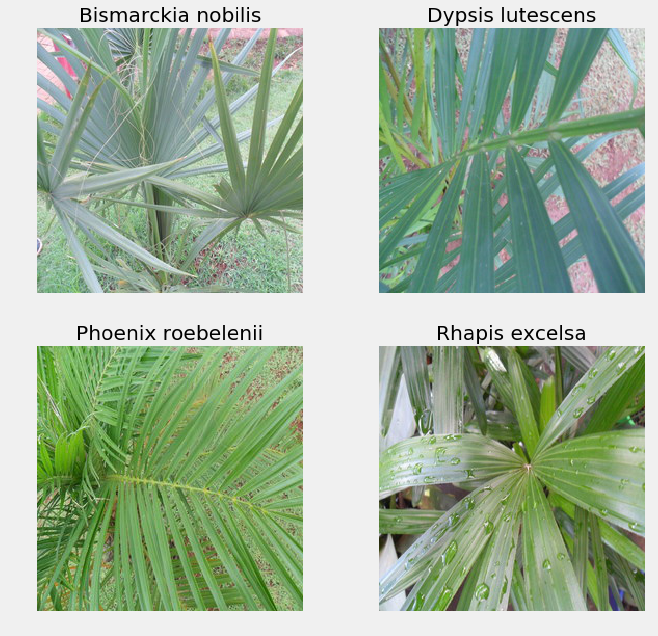

In [16]:
f, axarr = plt.subplots(2, 2, figsize=(10,10))

imgs = []
spcs = []
for plant in sorted(codes[codes['Family'] == 'Arecaceae'].index):
    path = os.path.join('/home/reneoctavio/Documents/Plantas+', 'Core', plant)
    img_f = os.path.join(path, random.choice(os.listdir(path)))
    imgs.append(Image.open(img_f))
    spcs.append(plant)
    
axarr[0, 0].imshow(imgs[0])
axarr[0, 0].set_title(spcs[0])
axarr[0, 1].imshow(imgs[1])
axarr[0, 1].set_title(spcs[1])
axarr[1, 0].imshow(imgs[2])
axarr[1, 0].set_title(spcs[2])
axarr[1, 1].imshow(imgs[3])
axarr[1, 1].set_title(spcs[3])
for a in axarr:
    a[0].axis('off')
    a[1].axis('off')

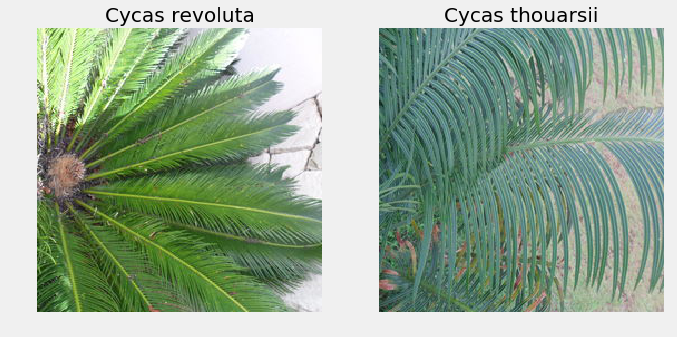

In [17]:
f, axarr = plt.subplots(1, 2, figsize=(10,10))

imgs = []
spcs = []
for plant in sorted(codes[codes['Family'] == 'Cycadaceae'].index):
    path = os.path.join('/home/reneoctavio/Documents/Plantas+', 'Core', plant)
    img_f = os.path.join(path, random.choice(os.listdir(path)))
    imgs.append(Image.open(img_f))
    spcs.append(plant)
    
axarr[0].imshow(imgs[0])
axarr[0].set_title(spcs[0])
axarr[1].imshow(imgs[1])
axarr[1].set_title(spcs[1])
for a in axarr:
    a.axis('off')

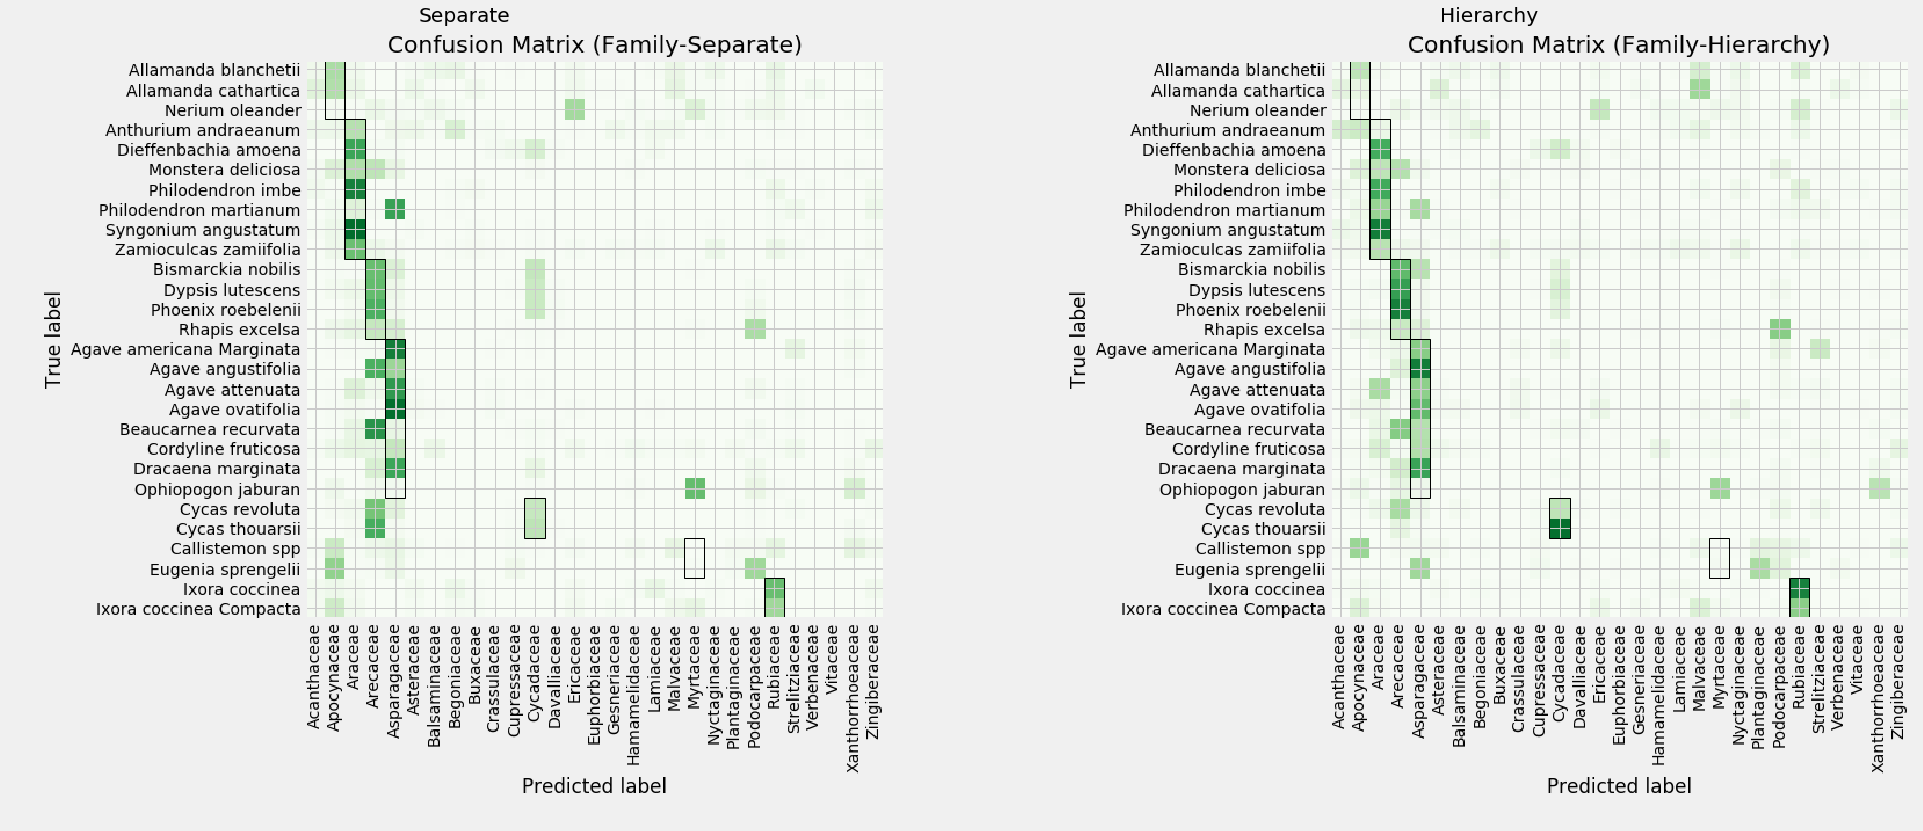

In [18]:
f, axarr = plt.subplots(1, 2, figsize=(30,30))

imgs = []
tp = []
for t in ['Separate', 'Hierarchy']:
    img_f = os.path.join('/home/reneoctavio/Documents/TaxPlant/resources/tree/analysis/test', 'cm-ext-Family-' + t + '.png')
    imgs.append(Image.open(img_f))
    tp.append(t)

axarr[0].imshow(imgs[0])
axarr[0].set_title(tp[0])
axarr[1].imshow(imgs[1])
axarr[1].set_title(tp[1])
for a in axarr:
    a.axis('off')

Most Arecaceae gets better in Hierarchy, except for Raphis excelsa. 

What's the relation of Rhapis excelsa and Podocarpus macrophyllus, in both models?
They are visually different, what's the underlying similiarity spotted?

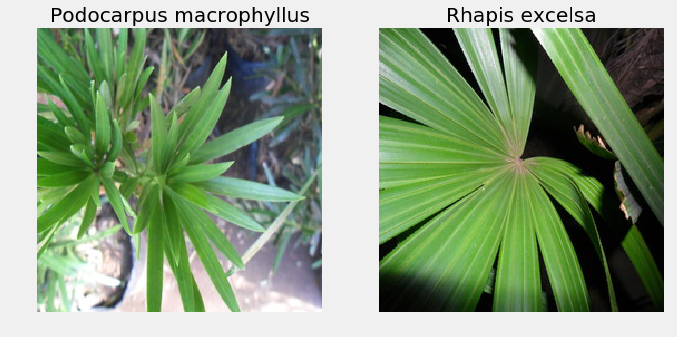

In [19]:
f, axarr = plt.subplots(1, 2, figsize=(10,10))

imgs = []
spcs = []
for plant in ['Podocarpus macrophyllus', 'Rhapis excelsa']:
    path = os.path.join('/home/reneoctavio/Documents/Plantas+', 'Core', plant)
    img_f = os.path.join(path, random.choice(os.listdir(path)))
    imgs.append(Image.open(img_f))
    spcs.append(plant)
    
axarr[0].imshow(imgs[0])
axarr[0].set_title(spcs[0])
axarr[1].imshow(imgs[1])
axarr[1].set_title(spcs[1])
for a in axarr:
    a.axis('off')

# Worsening of Allamandas

Allamandas got worse with Hierarchy.
Allamandas are very similar between themselves, however, the systems likes to classificate them as Hibiscus rosa-sinensis.

Only one common ancestor.

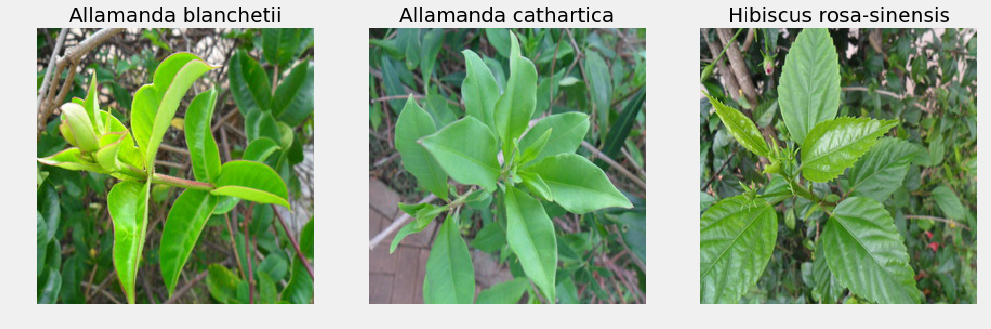

In [22]:
f, axarr = plt.subplots(1, 3, figsize=(15,20))

imgs = []
spcs = []
for plant in ['Allamanda blanchetii', 'Allamanda cathartica', 'Hibiscus rosa-sinensis']:
    path = os.path.join('/home/reneoctavio/Documents/Plantas+', 'Core', plant)
    img_f = os.path.join(path, random.choice(os.listdir(path)))
    imgs.append(Image.open(img_f))
    spcs.append(plant)
    
axarr[0].imshow(imgs[0])
axarr[0].set_title(spcs[0])
axarr[1].imshow(imgs[1])
axarr[1].set_title(spcs[1])
axarr[2].imshow(imgs[2])
axarr[2].set_title(spcs[2])
for a in axarr:
    a.axis('off')

# Agaves

Agave angustifolia have weak correlation between the other Agaves. For Separate, it is more similar to Bismarckia and for Hierarchy to Dracaena, however to a lower degree.

Accuracy decreases for all, in Hiearchy.


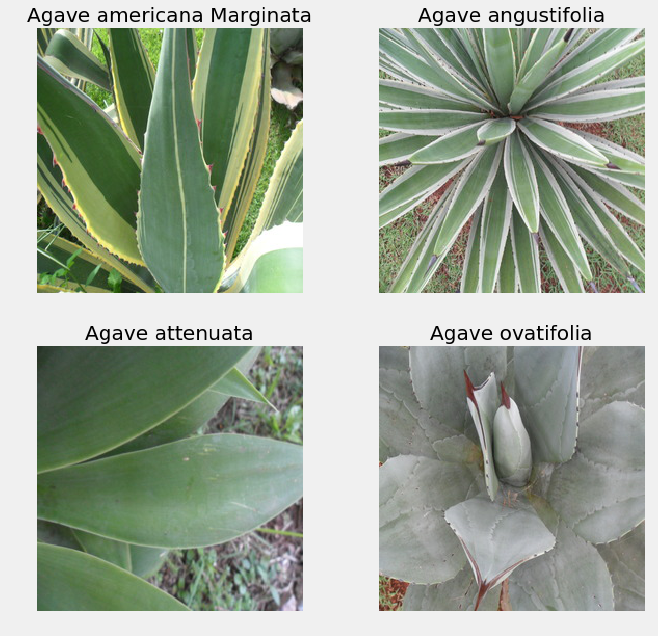

In [23]:
f, axarr = plt.subplots(2, 2, figsize=(10,10))

imgs = []
spcs = []
for plant in sorted(codes[codes['Genus'] == 'Agave'].index):
    path = os.path.join('/home/reneoctavio/Documents/Plantas+', 'Core', plant)
    img_f = os.path.join(path, random.choice(os.listdir(path)))
    imgs.append(Image.open(img_f))
    spcs.append(plant)
    
axarr[0, 0].imshow(imgs[0])
axarr[0, 0].set_title(spcs[0])
axarr[0, 1].imshow(imgs[1])
axarr[0, 1].set_title(spcs[1])
axarr[1, 0].imshow(imgs[2])
axarr[1, 0].set_title(spcs[2])
axarr[1, 1].imshow(imgs[3])
axarr[1, 1].set_title(spcs[3])
for a in axarr:
    a[0].axis('off')
    a[1].axis('off')

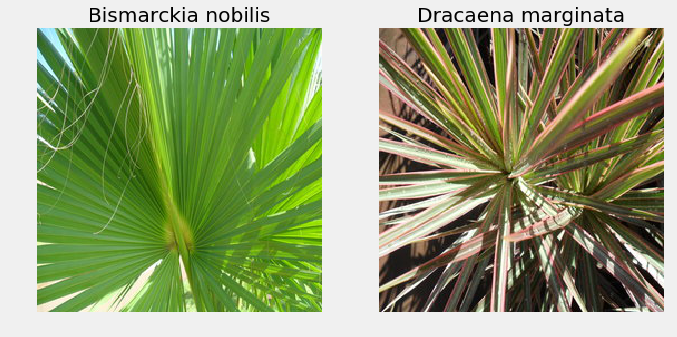

In [24]:
f, axarr = plt.subplots(1, 2, figsize=(10,10))

imgs = []
spcs = []
for plant in ['Bismarckia nobilis', 'Dracaena marginata']:
    path = os.path.join('/home/reneoctavio/Documents/Plantas+', 'Core', plant)
    img_f = os.path.join(path, random.choice(os.listdir(path)))
    imgs.append(Image.open(img_f))
    spcs.append(plant)
    
axarr[0].imshow(imgs[0])
axarr[0].set_title(spcs[0])
axarr[1].imshow(imgs[1])
axarr[1].set_title(spcs[1])
for a in axarr:
    a.axis('off')

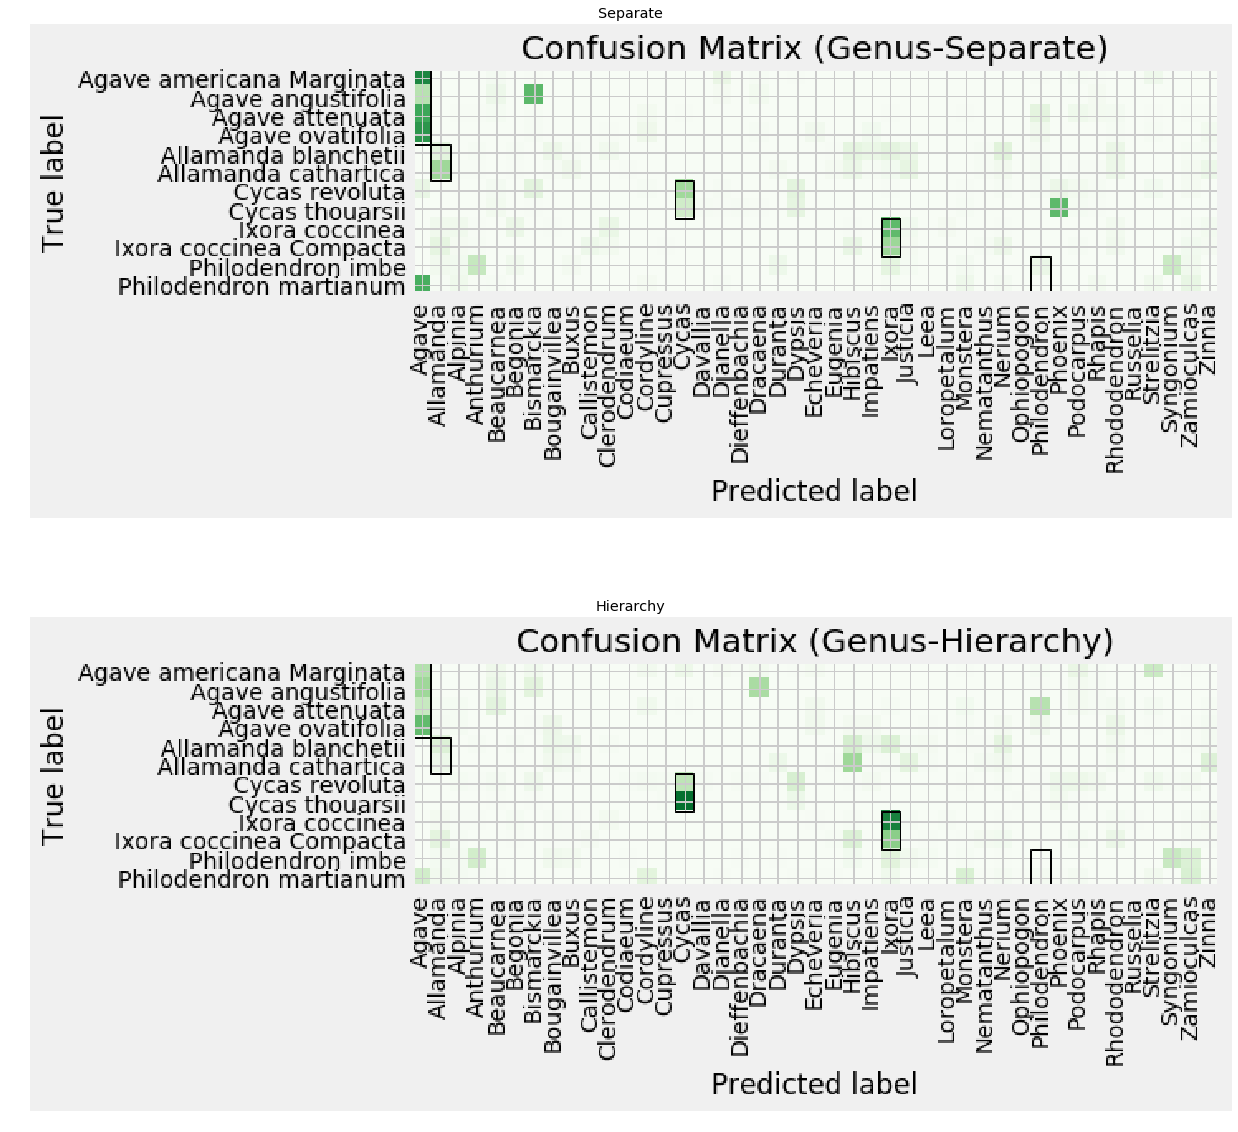

In [118]:
f, axarr = plt.subplots(2, 1, figsize=(20,20))

imgs = []
tp = []
for t in ['Separate', 'Hierarchy']:
    img_f = os.path.join('/home/reneoctavio/Documents/TaxPlant/resources/tree/analysis/test', 'cm-ext-Genus-' + t + '.png')
    imgs.append(Image.open(img_f))
    tp.append(t)

axarr[0].imshow(imgs[0])
axarr[0].set_title(tp[0])
axarr[1].imshow(imgs[1])
axarr[1].set_title(tp[1])
for a in axarr:
    a.axis('off')